pca란 지나치게 많은 조건으로 과대적합이 일어날 경우, 차원을 축소한다. 예를 들면, 어떤 데이터가 6차원 데이터라고 하자(칼럼의 갯수가 6개). 그럼 이걸 상관관계에 따라 2개,3개로 축소가 가능 한 것이다.

즉 만약, 2개의 변수로도 4개(전체)의 변수의  분산에 대해 설명할 수 있다면

target을 분류할 때 2개만 사용하면 되지 않을까? 

라는 생각에서 추론된 방법이다.

#1안

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


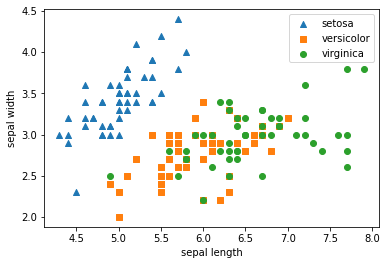

In [2]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

irisDF_inputs = irisDF.iloc[:,:4] # 타겟 값을 제외한 피쳐만 추출
iris_scaled = StandardScaler().fit_transform(irisDF_inputs)
iris_scale_DF = pd.DataFrame(iris_scaled)
iris_scale_DF['target'] = irisDF.target
iris_scale_DF.describe()

,0,1,2,3,target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


피처가 4개에서 2개로 줄었음.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 표준화 시켜줌
iris_scaled = StandardScaler().fit_transform(irisDF)

# 주성분 분석 ! 
pca = PCA(n_components=2) # n_components 몇개의 피쳐로 데이터 차원 줄일건지 

# fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
display(irisDF_pca.head(3))

# 주성분 분석 이후 평균/표준편차 확인 
display(irisDF_pca.describe())

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


,pca_component_1,pca_component_2,target
count,1.500000e+02,1.500000e+02,150.000000
mean,5.684342e-16,2.960595e-18,1.000000
std,1.965393e+00,9.593078e-01,0.819232
min,-3.014405e+00,-2.654668e+00,0.000000
25%,-2.434041e+00,-6.017186e-01,0.000000
50%,3.804884e-01,2.099666e-02,1.000000
75%,1.751151e+00,5.962896e-01,2.000000
max,3.475896e+00,2.680473e+00,2.000000


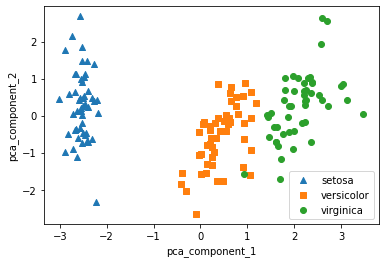

In [6]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

#2안

In [19]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data.shape)
# (150, 4)

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
result = scaler.fit_transform(data)
data_scaled = pd.DataFrame(result, columns=iris.feature_names)
data_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(data_scaled)

result = pd.DataFrame(result, columns=["x", "y"])
result

,x,y
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [17]:
target = pd.DataFrame(iris.target, columns=['type'])


In [22]:
target

,type
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [23]:
target['type'] = target['type'].apply(lambda x: iris.target_names[x])

In [24]:
target

,type
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [25]:
merged = pd.concat([result, target], axis=1)

In [26]:
merged

,x,y,type
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


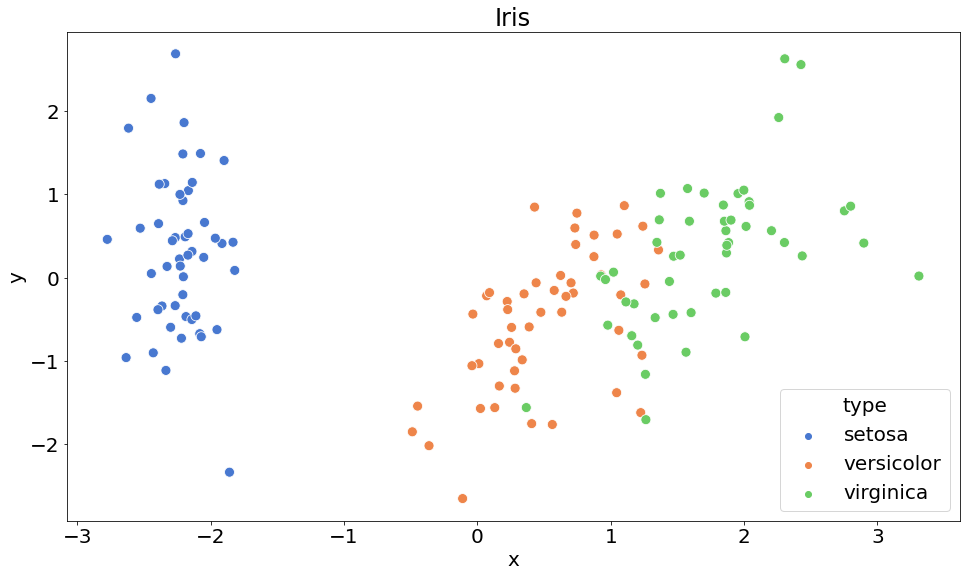

In [27]:
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns

%matplotlib inline

# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['type'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=3),
                    )
plt.title('Iris')
plt.show()

In [37]:
pca = PCA(n_components=3)

printcipalComponents = pca.fit_transform(data_scaled)

principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2', '3'])

pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [38]:
sum(pca.explained_variance_ratio_)

0.9948212908928452

In [39]:
pca = PCA(n_components=2)

printcipalComponents = pca.fit_transform(data_scaled)

principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component2', '3'])

pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [40]:
sum(pca.explained_variance_ratio_)

0.9581320720000165

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [42]:
X_train_pca

array([[-9.53328811e-01, -7.31770007e-01],
       [-2.75093992e+00, -1.16354833e-01],
       [ 1.73722893e+00, -5.24172914e-01],
       [ 3.37163453e+00,  5.05826677e-01],
       [ 1.26224991e+00,  6.80049619e-01],
       [ 2.11336648e+00,  8.63225358e-02],
       [ 1.35119999e+00, -3.13409370e-01],
       [ 4.66630066e-01, -1.21263640e+00],
       [ 6.08510619e-01,  1.80280686e-02],
       [-2.43530863e+00,  2.30282413e-01],
       [-2.61298134e+00,  1.13839024e+00],
       [ 7.73886958e-01, -3.60898532e-01],
       [-2.54310239e+00, -8.82735326e-02],
       [-2.93014100e+00, -5.22295143e-01],
       [-1.14841400e-01, -6.90520426e-01],
       [-2.43612567e+00,  4.64955441e-01],
       [ 1.08107062e+00, -1.12920673e-01],
       [ 2.07197425e-01, -2.73842302e-01],
       [-2.70866233e+00, -5.55194931e-02],
       [-2.73508411e+00,  1.63844965e-01],
       [-2.35996379e-01, -6.61869068e-01],
       [-8.00742140e-01, -9.85923421e-01],
       [-2.65693647e+00,  2.15474766e-01],
       [ 1.